# Data


Number of data points: 	1797
Number of features: 	64

X: 
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]



------------------------------------------Images in dataset as example------------------------------



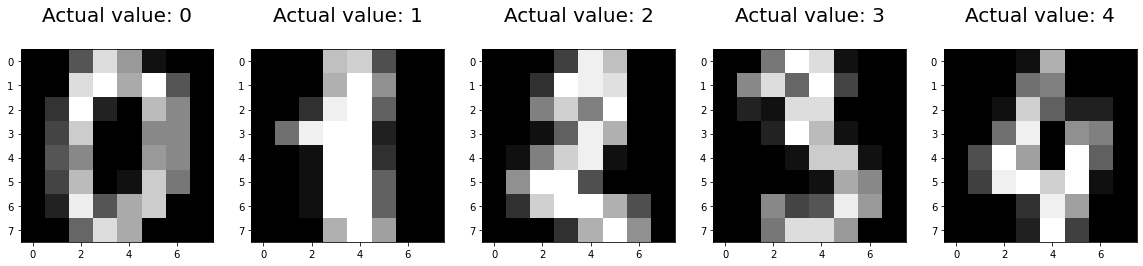

In [1]:
from sklearn.datasets import load_digits
import time
import matplotlib.pyplot as plt
import random
import numpy as np

data = load_digits()
X=data['data']
Y=data['target']

print(f"\nNumber of data points: \t{ X.shape[0] }")
print(f"Number of features: \t{ X.shape[1] }\n")
print(f"X: \n{X}\n\n")

print("\n------------------------------------------Images in dataset as example------------------------------\n")
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(data.data[0:5], data.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Actual value: %i\n' % label, fontsize = 20)

# Using Classifier without any transformation of dataset

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)

predictions = logisticRegr.predict(X_test)

correct=0
total=0
for i in range(len(predictions)):
    if(predictions[i]==Y_test[i]):
        correct+=1
    total+=1
score=(correct*100)/total
print(score)
# score = logisticRegr.score(X_test, Y_test)
# print(score)


96.29629629629629


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Using Classifier after applying Dimensionality reduction 

# PCA

In [3]:
from sklearn.decomposition import PCA
begin_PCA = time.time()
pca = PCA(2)
pca.fit(X)
X_transformed_pca=pca.transform(X)
end_PCA=time.time()

time_PCA=end_PCA-begin_PCA


print(f"Time taken by PCA :\t{time_PCA}")

print(f"\n\nX: \n{X_transformed_pca}\n\n")

Time taken by PCA :	0.008780479431152344


X: 
[[ -1.25946695  21.27488846]
 [  7.95761318 -20.76871234]
 [  6.99192213  -9.9559819 ]
 ...
 [ 10.80128327  -6.96024963]
 [ -4.87210077  12.42395997]
 [ -0.34439178   6.36556472]]




In [4]:

X_transformed_pca_train, X_transformed_pca_test, Y_train, Y_test = train_test_split(X_transformed_pca, Y, test_size=0.33, random_state=42)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_transformed_pca_train, Y_train)

predictions = logisticRegr.predict(X_transformed_pca_test)

correct=0
total=0
for i in range(len(predictions)):
    if(predictions[i]==Y_test[i]):
        correct+=1
    total+=1
score=(correct*100)/total
print("Accuracy :",score,"%")

Accuracy : 60.437710437710436 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KPCA

In [5]:
from nystrompca import KernelPCA

begin_KPCA = time.time()
kpca = KernelPCA(sigma=100, scale=False)
kpca.fit_transform(X)
end_KPCA=time.time()
X_transformed_kpca=kpca.scores_
time_KPCA=end_KPCA-begin_KPCA


# print(f"Kernel PCA variance captured:\t{kpca.explained_variance_.sum():.4f}")
print(f"Time taken by KPCA :\t{time_KPCA}")

print(f"\n\nX: \n{X_transformed_kpca}\n\n")

Time taken by KPCA :	15.433667659759521


X: 
[[-0.02621402  0.27968157 -0.12320968  0.16480472 -0.10118919]
 [ 0.10986595 -0.26004777  0.05618478 -0.18410677  0.0611295 ]
 [ 0.09183789 -0.12396951  0.03761125 -0.14720767 -0.22449157]
 ...
 [ 0.14000556 -0.08683355  0.07049156 -0.08823219 -0.05188014]
 [-0.07272909  0.15702333 -0.12329936 -0.0907765   0.04384526]
 [-0.00488349  0.07650112  0.14169459 -0.09288157 -0.04004588]]




In [6]:
X_transformed_kpca_train, X_transformed_kpca_test, Y_train, Y_test = train_test_split(X_transformed_kpca, Y, test_size=0.33, random_state=42)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_transformed_kpca_train, Y_train)

predictions = logisticRegr.predict(X_transformed_kpca_test)

# score = logisticRegr.score(X_transformed_kpca_test, Y_test)
# print(score)
correct=0
total=0
for i in range(len(predictions)):
    if(predictions[i]==Y_test[i]):
        correct+=1
    total+=1
score=(correct*100)/total
print(score)

78.95622895622895


## Nyström method

In [7]:
from nystrompca import NystromKPCA

begin_nystrom=time.time()
nystrom_kpca = NystromKPCA(m_subset=10, sigma=100, scale=False)
nystrom_kpca.fit_transform(X)
X_transformed_nystrom=nystrom_kpca.scores_
end_nystrom=time.time()

time_nystrom=end_nystrom-begin_nystrom


# print(f"Nyström KPCA variance captured:\t{nystrom_kpca.explained_variance_.sum():.4f}")
print(f"Time taken by Nystrom :\t{time_nystrom}")


print(f"\n\nX: \n{X_transformed_nystrom}\n\n")

Time taken by Nystrom :	0.2188098430633545


X: 
[[ 0.1474513  -0.12996188  0.07413502  0.17096153 -0.08879174]
 [-0.06892699  0.20229749  0.00712452 -0.17302671  0.11080947]
 [-0.07666647  0.06995567  0.01654572 -0.15017569 -0.09397395]
 ...
 [ 0.07268891  0.0424341   0.01289179 -0.04891667 -0.04643819]
 [ 0.08218683 -0.06923403  0.21243317  0.02835671  0.00253648]
 [ 0.07090645 -0.11399481  0.01504549 -0.04097222 -0.08552826]]




In [8]:
X_transformed_nystrom_train, X_transformed_nystrom_test, Y_train, Y_test = train_test_split(X_transformed_nystrom, Y, test_size=0.33, random_state=42)

logisticRegr = LogisticRegression()
logisticRegr.fit(X_transformed_nystrom_train, Y_train)

predictions = logisticRegr.predict(X_transformed_nystrom_test)

# score = logisticRegr.score(X_transformed_nystrom_test, Y_test)
# print(score)
correct=0
total=0
for i in range(len(predictions)):
    if(predictions[i]==Y_test[i]):
        correct+=1
    total+=1
score=(correct*100)/total
print(score)

76.0942760942761
